In [3]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import Scikit_Learn libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score


Simple linear Regression

In [5]:
#Predict how much loan amount can they apply for by annual income of customer

In [6]:
#one feautr -one target

In [7]:
df = pd.read_csv('financial_loan_data.csv')

In [8]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2/11/2021,9/13/2021,4/13/2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,1/1/2021,12/14/2021,1/15/2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,1/5/2021,12/12/2021,1/9/2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2/25/2021,12/12/2021,3/12/2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,1/1/2021,12/14/2021,1/15/2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


#Define Feature and Target

In [11]:
xVar = 'annual_income'
yVar = 'loan_amount'

In [14]:
#Feautre
X = df[[xVar]]
#Target
Y = df[yVar]

Train and Test Data

In [16]:
X_train ,X_test ,Y_train , Y_test = train_test_split(
    X,Y,test_size=0.2,random_state = 42
)

Fit data in model

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train,Y_train)

LinearRegression()

In [24]:
Y_pred = model.predict(X_test)

In [26]:
Y_pred

array([12213.26888783, 10413.19663251, 12263.36577539, ...,
       10379.03966372, 10370.50042152, 10396.11814811])

In [27]:
beta_0 = model.intercept_
beta_1 = model.coef_[0]

In [28]:
print(f"Intercept:{beta_0}")
print(f"Slope/coefficient:{beta_1}")

Intercept:9303.095146782538
Slope/coefficient:0.028464140659650895


Calculate Metrices

In [30]:
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)

In [32]:
print(f"RMSE : {rmse}")
print(f"R2 Score:{r2}")

RMSE : 7112.284646213263
R2 Score:0.09134780276962673


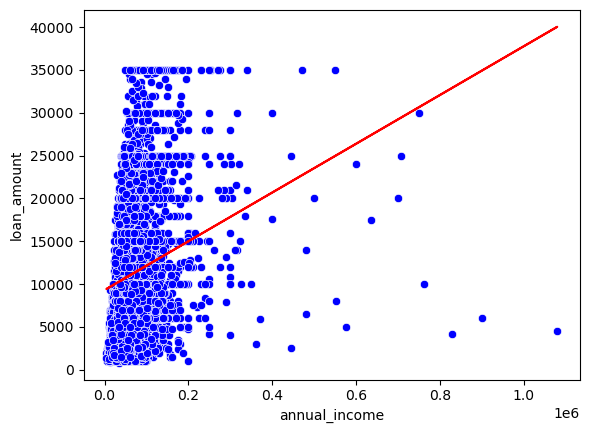

In [33]:
sns.scatterplot(x = X_test[xVar],y=Y_test,color='blue')
plt.plot(X_test[xVar],Y_pred,color='red')

In [35]:
#Predict new data
new_annual_income = {
    'annual_income':[100000,300000,1000000]
}

In [37]:
X_new = pd.DataFrame(new_annual_income)

In [39]:
X_new

,annual_income
0,100000
1,300000
2,1000000


In [41]:
Y_new_pred = model.predict(X_new)
Y_new_pred

array([12149.50921275, 17842.33734468, 37767.23580643])

In [43]:
X_new['Predicted_Loan_Amount'] = Y_new_pred

In [45]:
X_new

,annual_income,Predicted_Loan_Amount
0,100000,12149.509213
1,300000,17842.337345
2,1000000,37767.235806


Multi Linear Regression

In [58]:
df.columns


Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [60]:
features = ['annual_income','dti','int_rate','total_acc']
target = 'loan_amount'

In [62]:
X = df[features]
Y = df[target]

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size = 0.2,random_state=42
)

In [68]:
model = LinearRegression()

In [72]:
model.fit(X_train,Y_train)

LinearRegression()

In [74]:
Y_pred = model.predict(X_test)

In [76]:
beta_0 = model.intercept_
beta_1 = model.coef_[0]

In [78]:
#Calculate Metrics
rmse= np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)

In [80]:
print(f"RMSE : {rmse}")
print(f"R2 Score : (r2)")


RMSE : 6620.026122182002
R2 Score : (r2)


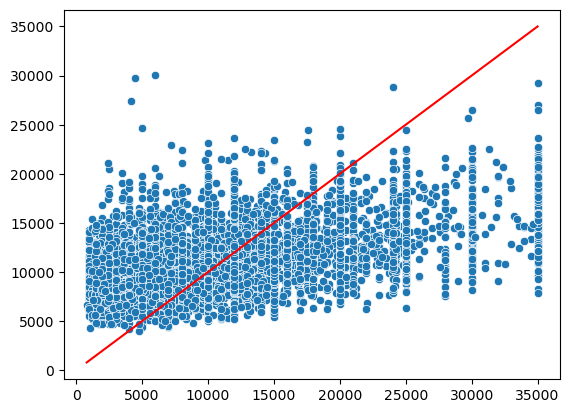

In [90]:
sns.scatterplot(x = Y_test.values.flatten(),y= Y_pred.flatten())
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],color = 'red')

In [92]:
new_pred = {
    'annual_income':[20000,500000],
    'dti':[0.035,0.056],
    'int_rate':[0.12,0.23],
    'total_acc':[4,6]  
}

In [94]:
X_new = pd.DataFrame(new_pred)

In [96]:
Y_new_pred = model.predict(X_new)

In [98]:
X_new['Predicted_loan_Amount'] = Y_new_pred

In [100]:
X_new

,annual_income,dti,int_rate,total_acc,Predicted_loan_Amount
0,20000,0.035,0.12,4,7542.309836
1,500000,0.056,0.23,6,24829.778796
